# Experiment 4
### Implement an image classification task using pre-trained models like AlexNet, VGGNet, InceptionNet and ResNet and compare the results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Necessary Libraries**

In [ ]:
import tensorflow.keras
import numpy as np
from tensorflow.keras import Input, models, layers, optimizers, applications
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import backend as k #allows the Keras library to work seamlessly with different deep learning backends, such as TensorFlow, Microsoft Cognitive Toolkit (CNTK).
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory( # vertical_flip=True,horizontal_flip=True,height_shift_range=0.1, width_shift_range=0.1
        '/content/drive/MyDrive/plant_village/train', target_size=(128, 128), batch_size=16, class_mode='categorical',)

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/plant_village/val', target_size=(128, 128), batch_size=16,
        class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/plant_village/test', target_size=(128, 128), batch_size=1,
        class_mode='categorical', shuffle=False)

Found 3022 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Found 546 images belonging to 4 classes.


# **Visualization of Few Images**

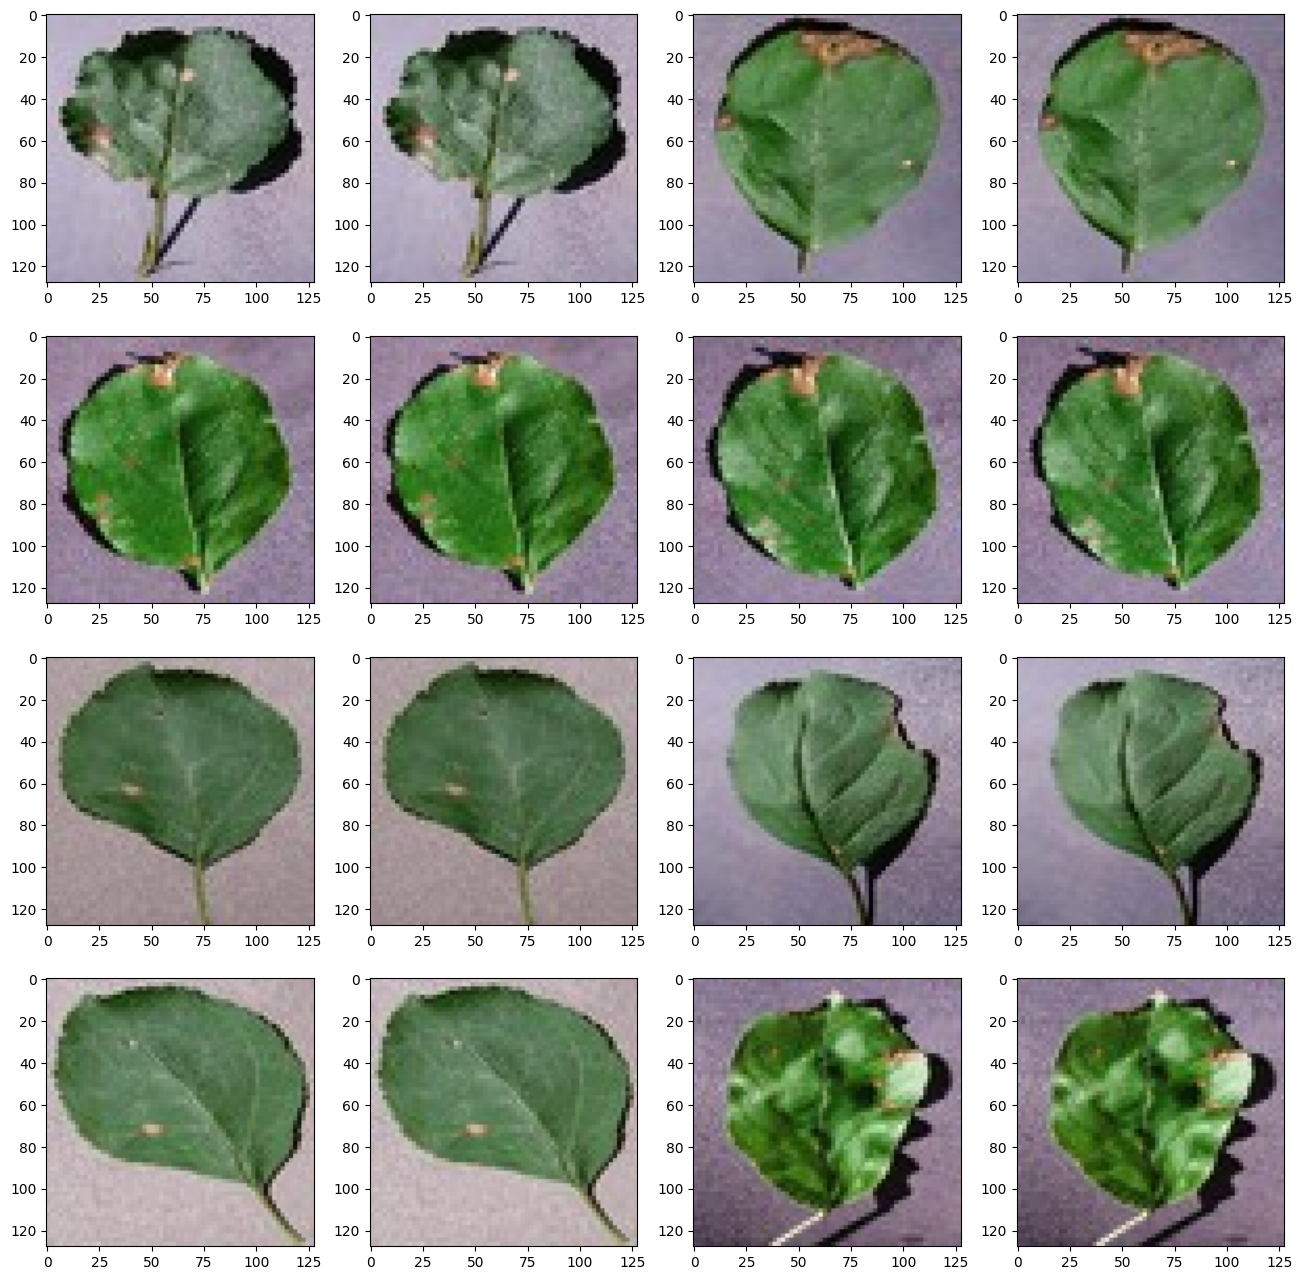

In [ ]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    img, label = test_generator.__next__()
    plt.imshow(img[0])
plt.show()

In [ ]:
img, label = test_generator.__next__()
img.shape

(1, 128, 128, 3)

# **Exploring Keras Applications for Transfer Learning**

## **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= (128, 128, 3)) # Include_top = False means excluding the model fully connected layers
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# **Adding top layers according to number of classes in our data**

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

model.summary()

ValueError: Undefined shapes are not supported.

# **Training**

In [ ]:
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples/train_generator.batch_size, epochs=30,
      validation_data=validation_generator, validation_steps=validation_generator.samples/validation_generator.batch_size, verbose=1)

In [ ]:
model.save("VGG16_plant_deseas.h5")
print("Saved model to disk")

In [ ]:
model_new = models.load_model('VGG16_plant_deseas.h5')
print("Model is loaded")

In [ ]:
model.save_weights('cnn_classification.h5')

# **Visualization of training over epoch**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

# **Performance measure**

In [ ]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

93.58974358974359

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

# **InceptionNet**

In [ ]:
from tensorflow.keras import applications

## Loading InceptionV3 model
base_model = applications.InceptionV3(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

In [ ]:
flatten_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    # dense_layer_1,
    # dense_layer_2,
    prediction_layer
])

model.summary()

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples/train_generator.batch_size, epochs=30,
      validation_data=validation_generator, validation_steps=validation_generator.samples/validation_generator.batch_size, verbose=1)

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

64.65201465201466

In [ ]:
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

# ResNet

In [ ]:
from tensorflow.keras import applications

## Loading ResNet50 model
base_model = applications.ResNet50(weights="imagenet", include_top=False, input_shape= (128, 128, 3))
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
input_layer = layers.Input(shape=(128, 128, 3))
x = base_model(input_layer)  # Pass the input through the base model

flatten_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(4, activation='softmax')

model = models.Sequential([
    input_layer,  # Include the input layer
    base_model,
    flatten_layer,
    prediction_layer
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,716,740 (56.14 MB)

 Trainable params: 2,052 (8.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator, steps_per_epoch=int(train_generator.samples/train_generator.batch_size), epochs=30,
    validation_data=validation_generator, validation_steps=int(validation_generator.samples/validation_generator.batch_size), verbose=1)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 20/188 ━━━━━━━━━━━━━━━━━━━━ 30:13 11s/step - acc: 0.4674 - loss: 1.2850

KeyboardInterrupt: 

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

31.5018315018315

In [ ]:
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

# **Functional Model**

### My VGG Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = VGG16(include_top=False, input_shape=(64, 64, 3))
# Model input shape can be defined as per ourselves but we have to reshape the input data in order to avoid any errors
for layer in vgg_model.layers:
    layer.trainable=False

flat1 = Flatten()(vgg_model.layers[-1].output)
class1 = Dense(512, activation='relu')(flat1)
class2 = Dense(256, activation='relu')(class1)
output = Dense(4, activation='sigmoid')(class2)

model = Model(inputs = vgg_model.inputs, outputs = output)

In [ ]:
model.summary()

In [ ]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory( # vertical_flip=True, horizontal_flip=Trueheight_shift_range=0.1, width_shift_range=0.1
        '/workspace/Divyam/Dataset/plant_village/plant_village/train', target_size=(64, 64), batch_size=16, class_mode='categorical',)

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory('/workspace/Divyam/Dataset/plant_village/plant_village/val',
        target_size=(64, 64), batch_size=16, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory('/workspace/Divyam/Dataset/plant_village/plant_village/test',target_size=(64, 64),
        batch_size=1, class_mode='categorical', shuffle=False)


In [ ]:
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

96.15384615384616

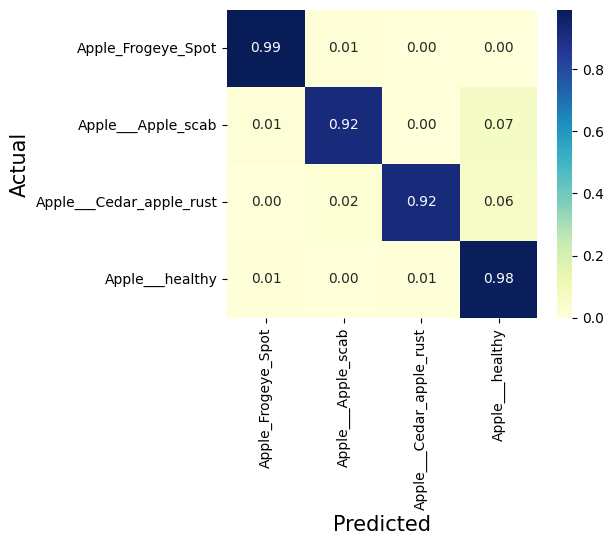

In [ ]:
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.96      0.99      0.98       103
      Apple___Apple_scab       0.98      0.92      0.95       134
Apple___Cedar_apple_rust       0.96      0.92      0.94        49
         Apple___healthy       0.96      0.98      0.97       260

                accuracy                           0.96       546
               macro avg       0.96      0.95      0.96       546
            weighted avg       0.96      0.96      0.96       546



In [ ]:
# Changed the input shape of VGG model to (64,64,3)
# Added two Dense layers in VGG model with 512 neurons and 256 neurons respectively

### My InceptionNet Model

In [ ]:
from tensorflow.keras.applications import InceptionV3
inception_model = InceptionV3(include_top=False, input_shape=(128, 128, 3))
# Model input shape can be defined as per ourselves but we have to reshape the input data in order to avoid any errors
for layer in inception_model.layers:
    layer.trainable=False

flat1 = Flatten()(inception_model.layers[-1].output)
class1 = Dense(512, activation='relu')(flat1)
class2 = Dense(256, activation='relu')(class1)
output = Dense(4, activation='softmax')(class2)

model = Model(inputs = inception_model.inputs, outputs = output)

In [ ]:
model.summary()

In [ ]:
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

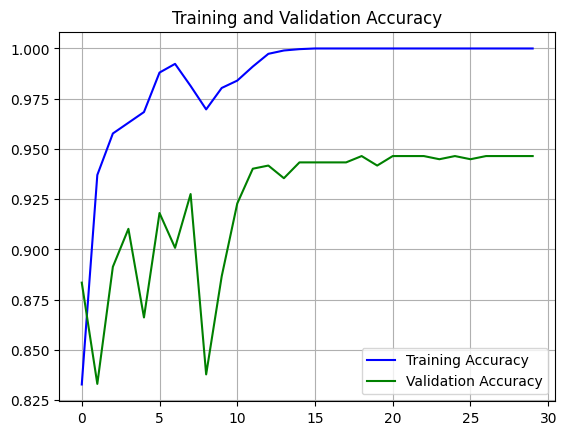

<Figure size 640x480 with 0 Axes>

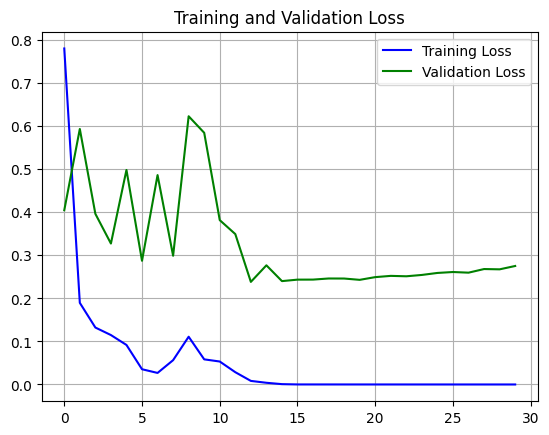

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

91.75824175824175

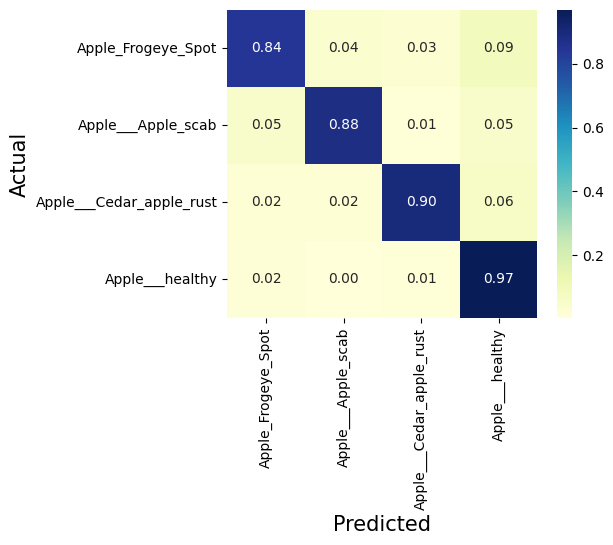

In [ ]:
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
# Added two Dense layers in VGG model with 512 neurons and 256 neurons respectively

### My ResNet Model

In [ ]:
from tensorflow.keras import applications
## Loading ResNet50 model
resnet_model = applications.ResNet50(include_top=False, input_shape= (128, 128, 3))
resnet_model.trainable = False ## Not trainable weights

flat1 = Flatten()(resnet_model.layers[-1].output)
class1 = Dense(128, activation='relu')(flat1)
output = Dense(4, activation='softmax')(class1)
model = Model(inputs = resnet_model.inputs, outputs = output)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

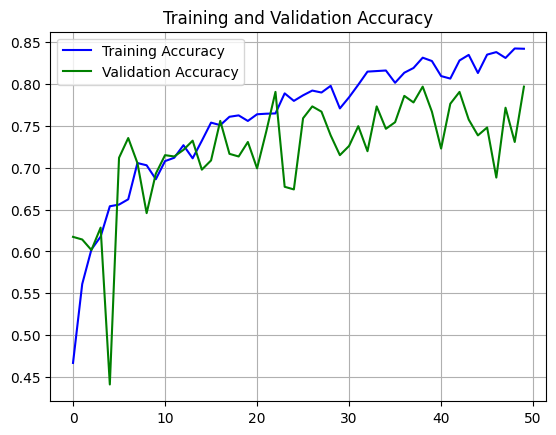

<Figure size 640x480 with 0 Axes>

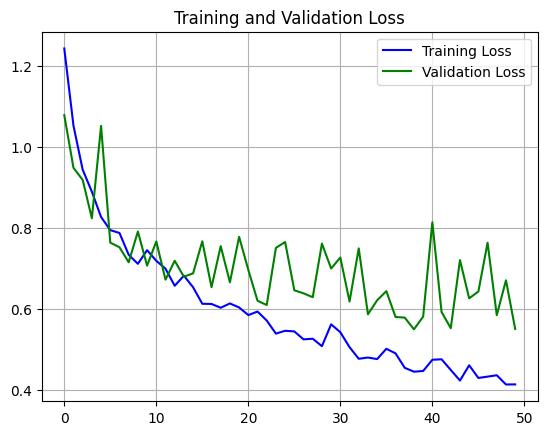

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
fnames = test_generator.filenames
ground_truth = test_generator.classes
label2index = test_generator.class_indices
idx2label = dict((v,k) for k,v in label2index.items())
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

In [ ]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

80.40293040293041

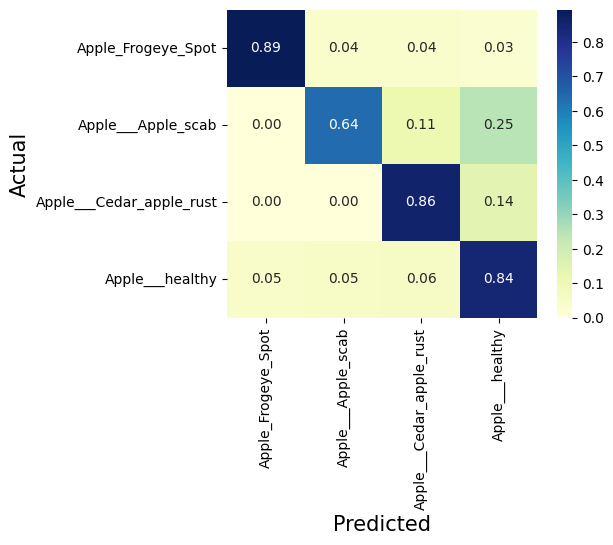

In [ ]:
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

In [ ]:
# Added one Dense layer with 128 neuron which increased the accuracy from 31% to 80%